In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
elon = pd.read_csv("C:/Users/kiran/Desktop/Assignments/Text Mining/Elon_musk.csv", encoding='unicode_escape', usecols=[1])
elon

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
elon.Text.str.contains('https://').value_counts() / len(elon)

False    0.678339
True     0.321661
Name: Text, dtype: float64

In [4]:
elon.Text.str.contains('@').value_counts() / len(elon)

True     0.83942
False    0.16058
Name: Text, dtype: float64

[Text(0, 0, 'SpaceX'),
 Text(1, 0, 'Erdayastronaut'),
 Text(2, 0, 'PPathole'),
 Text(3, 0, 'flcnhvy'),
 Text(4, 0, 'Tesla'),
 Text(5, 0, 'WholeMarsBlog'),
 Text(6, 0, 'teslaownersSV'),
 Text(7, 0, 'Teslarati'),
 Text(8, 0, 'NASASpaceflight'),
 Text(9, 0, 'cleantechnica'),
 Text(10, 0, 'Kristennetten'),
 Text(11, 0, 'RationalEtienne'),
 Text(12, 0, 'ID_AA_Carmack'),
 Text(13, 0, 'MarcusHouseGame'),
 Text(14, 0, 'engineers_feed'),
 Text(15, 0, 'ErcXspace'),
 Text(16, 0, 'EvaFoxU'),
 Text(17, 0, 'ajtourville'),
 Text(18, 0, 'NASA'),
 Text(19, 0, 'lexfridman')]

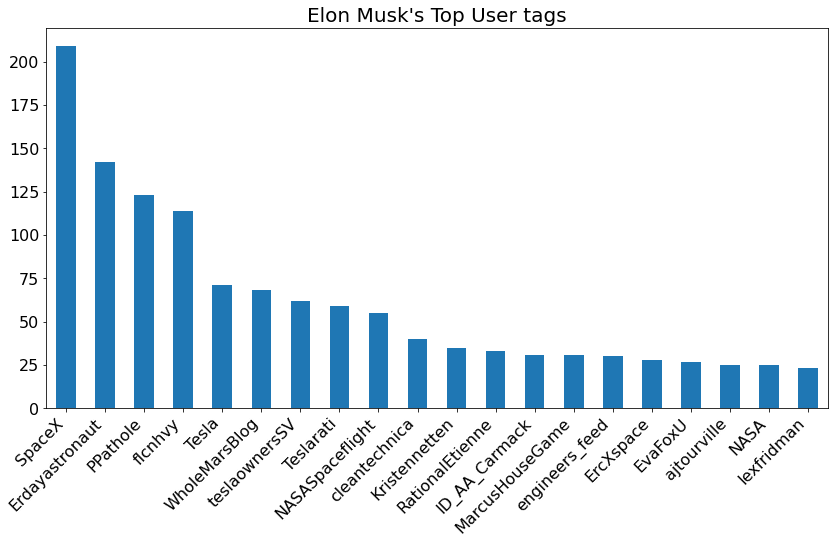

In [5]:
import itertools

c = list(
itertools.chain(
    *elon.Text.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ") 
                            if '@' in handle.replace(":", "")]).tolist()))

pd.Series(c).value_counts().head(20).plot.bar(figsize=(14, 7), fontsize=16)
plt.gca().set_title('Elon Musk\'s Top User tags', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right', fontsize=16)

In [6]:
from nltk import word_tokenize
tokens = elon.Text.map(word_tokenize)

def Elon_Musk_Opinion_on(x):
    x_l = x.lower()
    x_t = x.title()
    return elon.loc[tokens.map(lambda sent: x_l in sent or x_t in sent).values]

In [7]:
Elon_Musk_Opinion_on('Space').Text.values.tolist()

['RT @SpaceX: This mission enables access for everyday people who dream of going to space',
 '@NASASpaceflight Unlike its aircraft division, which is fine, the FAA space division has a fundamentally broken reg\x85 https://t.co/sI63AXBJbz',
 'RT @SpaceX: SpaceX\x92s rideshare offering provides increased access to space for small satellite operators seeking a reliable, affordable rid\x85',
 '@engineers_feed Not to get to orbit, unfortunately. In space, photon emission powered by matter-antimatter annihila\x85 https://t.co/Y8PO10oPQN',
 '@wonderofscience Near-orbital space is the fastest way to travel long distance on Earth!',
 '@SpaceX @Space_Station It\x92s called the Space \x93Station\x94, but it\x92s actually moving around Earth at ~25 times the spee\x85 https://t.co/vYVIvrtZsa',
 '@shifthappends @Tesla A lot of my brain space is spent dealing with both units!',
 'RT @NASA: <U+0001F409> Enter the Crew Dragon. At 4:48 p.m. EST (9:48 p.m. UTC), the NASA @SpaceX Crew-1 astronauts give yo

In [8]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii') # A function to remove emojis from the reviews

In [9]:
# Function for Cleaning the tweets
import re
import string
def cleantext(tweet):
    tweet = tweet.lower()
    tweet = deEmojify(tweet)
    tweet = re.sub(r"@[A-Za-z0-9]+", "", tweet) # Remove Mentions
    tweet = re.sub(r"#", "", tweet) # Remove Hashtags Symbol
    tweet = re.sub(r"RT[\s]+", "", tweet) # Remove Retweets
    tweet = re.sub(r"https?:\/\/\S+", "", tweet) # Remove The Hyper Link
    tweet = "".join([x for x in tweet if x not in string.punctuation])
    return tweet

In [10]:
# Clean The Text
elon["Text"] = elon["Text"].apply(cleantext)
elon.head()

,Text
0,im an alien
1,aacarmack ray tracing on cyberpunk with hdr is...
2,great interview
3,doge is underestimated
4,congratulations tesla china for amazing execu...


In [11]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
elon[["subjectivity", "polarity"]] = elon.apply(sentiment_analysis, axis=1)

elon

,Text,subjectivity,polarity
0,im an alien,0.750000,-0.250000
1,aacarmack ray tracing on cyberpunk with hdr is...,0.000000,0.000000
2,great interview,0.750000,0.800000
3,doge is underestimated,0.000000,0.000000
4,congratulations tesla china for amazing execu...,0.366667,0.275000
...,...,...,...
1994,true it sounds so surreal but the negative pr...,0.508333,0.111111
1995,make sure to read ur terms amp conditions bef...,0.888889,0.500000
1996,samwise gamgee,0.000000,0.000000
1997,altho dumb and dumber is u0001f525u0001f525,0.500000,-0.375000


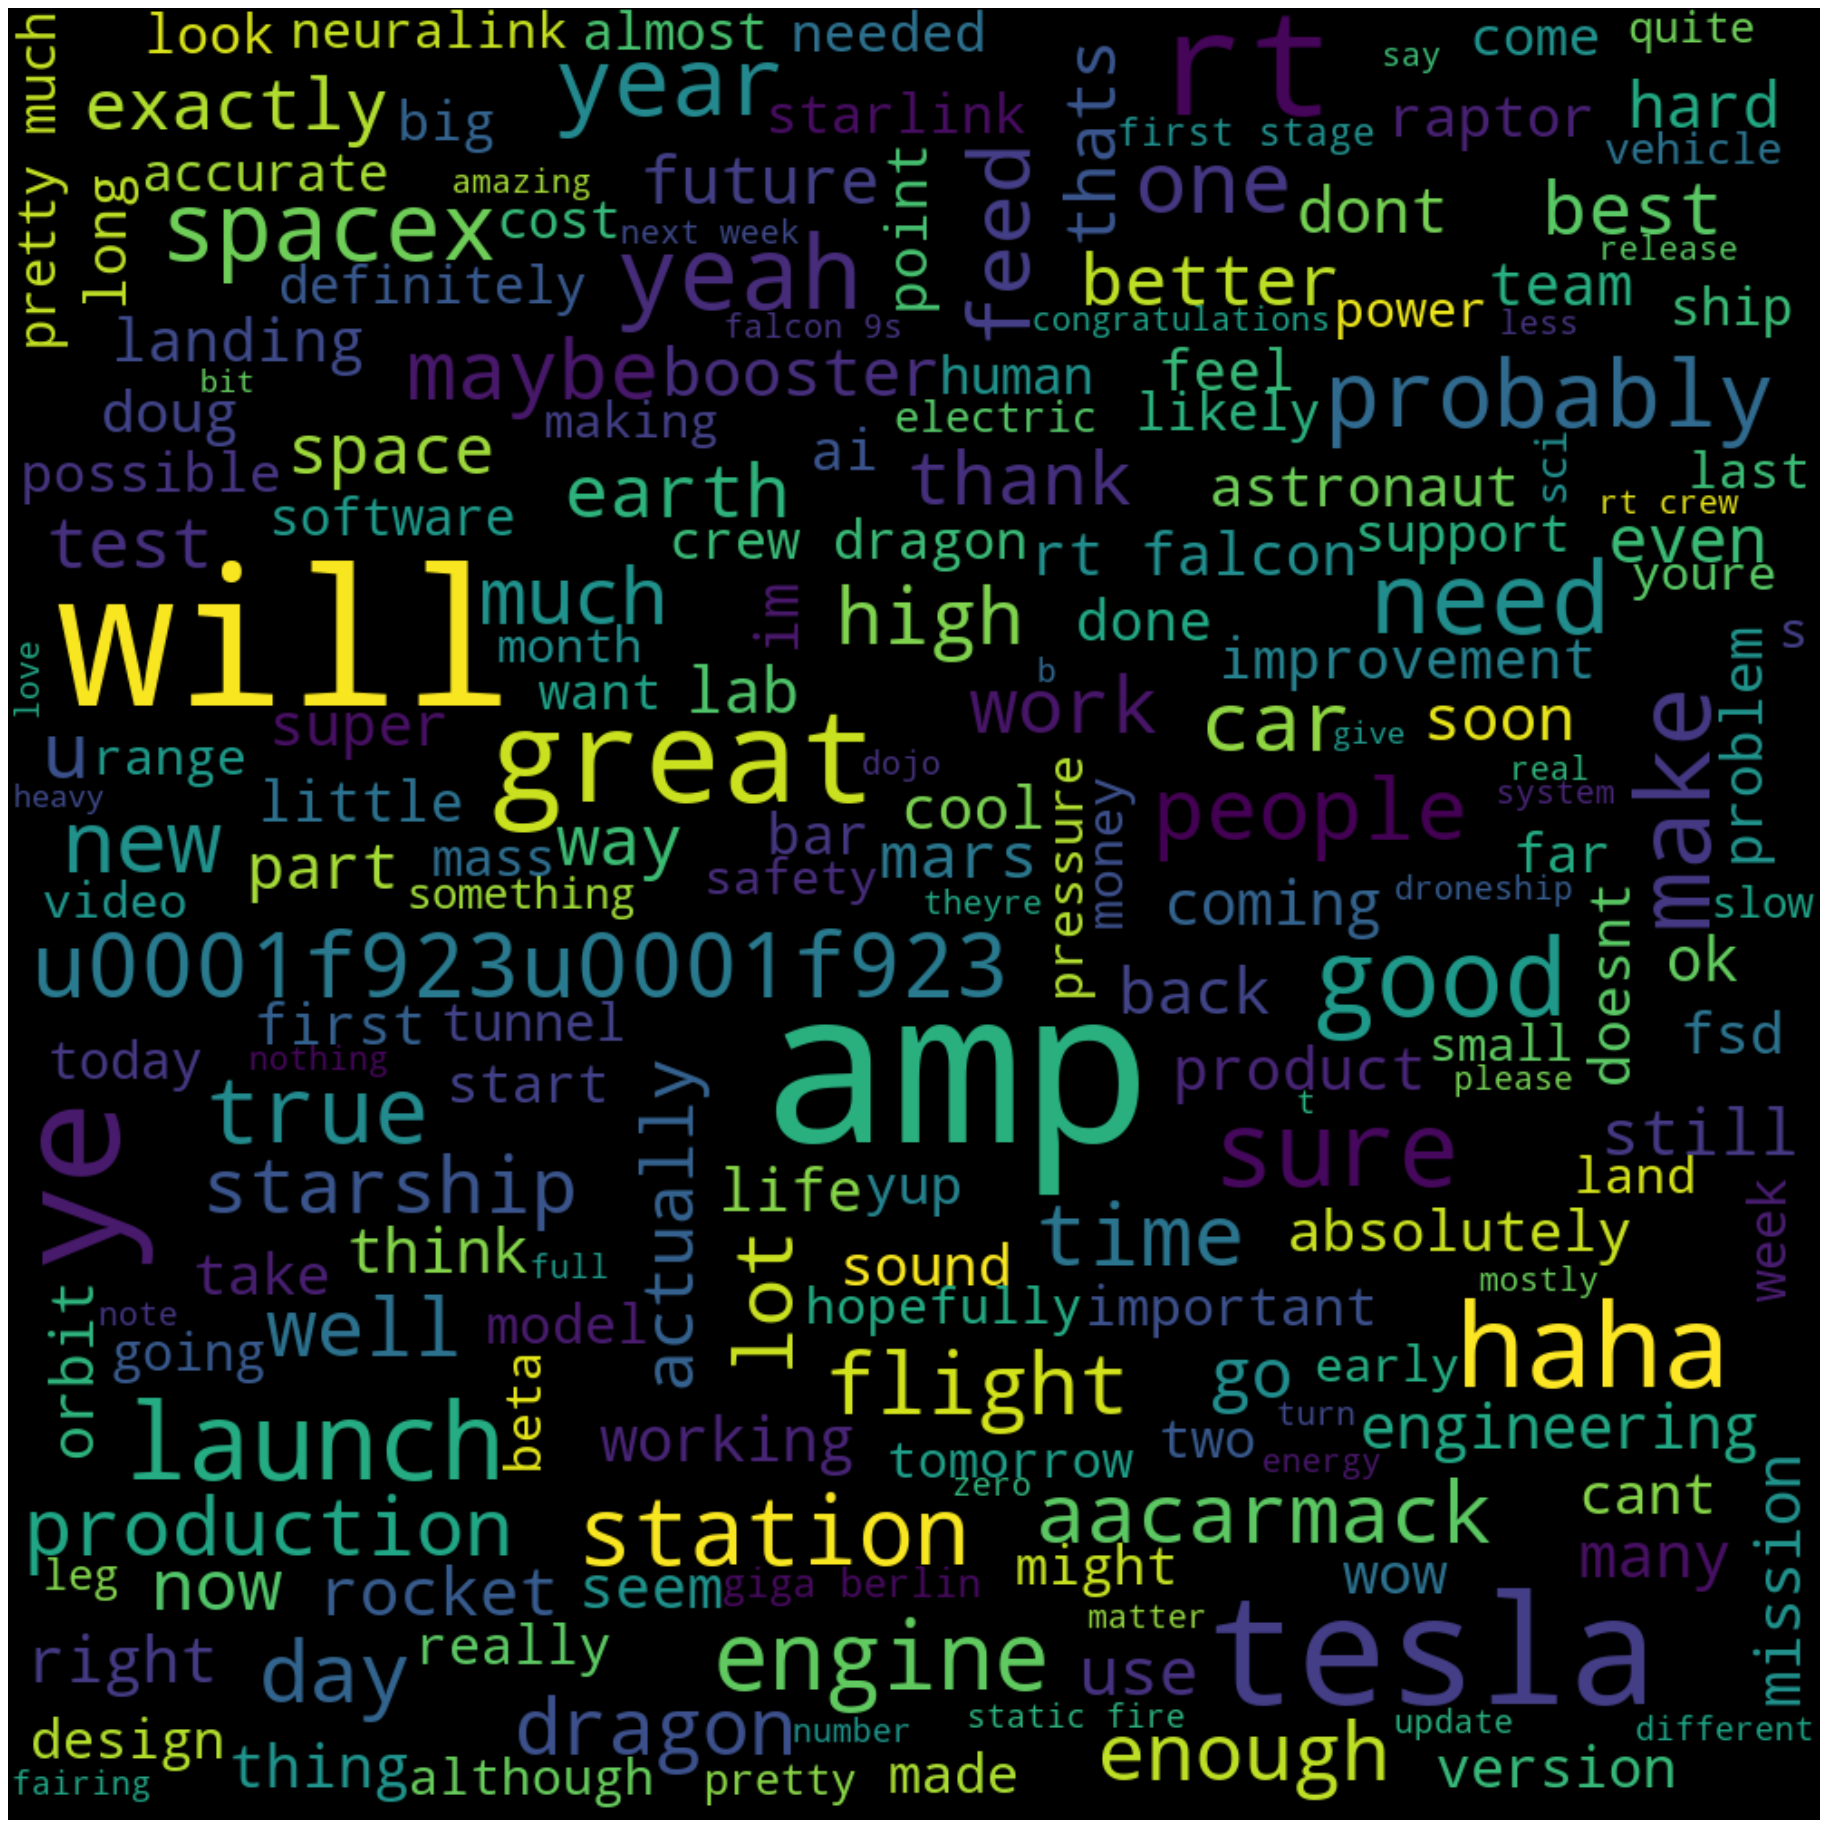

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([twts for twts in elon["Text"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 120).generate(allwords)
plt.figure(figsize=(40, 30), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [13]:
# Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
elon["analysis"] = elon["polarity"].apply(analysis)

In [14]:
positive_tweets = elon[elon['analysis'] == 'Positive']
negative_tweets = elon[elon['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
  print(' -' + row['Text'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
  print(' -' + row['Text'])

positive tweets
 -  great interview
 - congratulations tesla china for amazing execution last year now on to the next for even more
 -happy new year of the ox 
 -   haha thanks 
 -the most entertaining outcome is the most likely
negative tweets
 - im an alien
 - your app sucks
 -  starlink is a staggeringly difficult technical amp economic endeavor however if we don 
 -  spacex needs to pass through a deep chasm of negative cash flow over the next year or 
 - everyone at tesla receives stock 

my comp is all stockoptions which i do not take off the table 

thats what youre missing


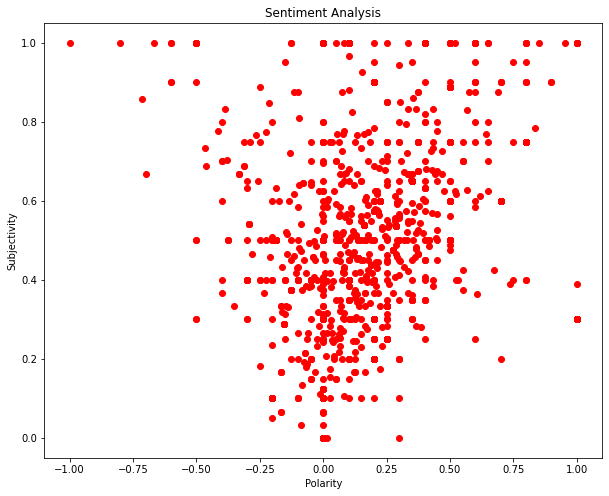

In [15]:
# Is Elon generally positive or negative?
plt.figure(figsize=(10, 8))

for i in range(0, elon.shape[0]):
    plt.scatter(elon["polarity"][i], elon["subjectivity"][i], color = "Red")

plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph

In [16]:
# Ratio of positive over negative tweets
len(positive_tweets) / len(negative_tweets)

3.990950226244344